In [2]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyhdf.SD import SD, SDC

In [3]:
cloud_product = '/neodc/modis/data/MOD06_L2/collection61/2024/01/01/MOD06_L2.A2024001.0000.061.2024004163458.hdf'
hdf_cloud = SD(cloud_product, SDC.READ)
geolocation = '/neodc/modis/data/MOD03/collection61/2024/01/01/MOD03.A2024001.0000.061.2024003022108.hdf'
hdf_geo = SD(geolocation, SDC.READ)

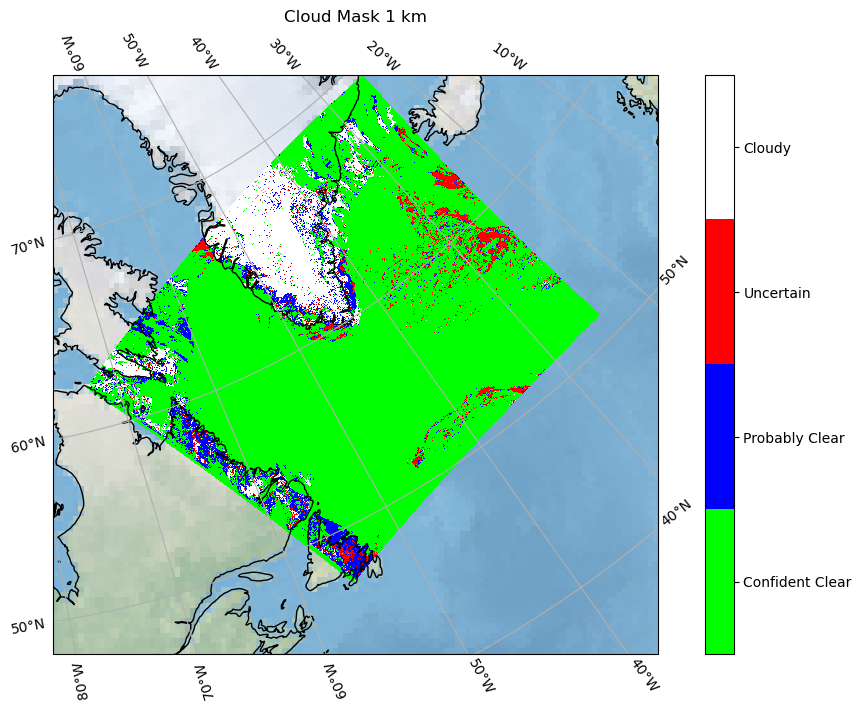

In [4]:
def get_quality_flag(x):
    return int(bin((2 ** 8 - 1) & x >> 2)[-1] + bin((2 ** 8 - 1) & x >> 1)[-1], 2)

fig = plt.figure(figsize=(10, 7))
cmap = mcolors.ListedColormap(['lime', 'blue', 'red', 'white'])
lat = hdf_geo.select('Latitude')[:]
lon = hdf_geo.select('Longitude')[:]
cm = hdf_cloud.select('Cloud_Mask_1km')[:]
quality = cm[0]
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.stock_img()
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
fill = ax.pcolormesh(lon, lat, np.vectorize(get_quality_flag)(cm)[:, :, 0], cmap=cmap, vmin=-0.5, vmax=3.5, transform=ccrs.PlateCarree())
cbar = fig.colorbar(fill)
cbar.ax.set_yticks([0, 1, 2, 3])
cbar.ax.set_yticklabels(['Confident Clear', 'Probably Clear', 'Uncertain', 'Cloudy'])
ax.set_title('Cloud Mask 1 km')
fig.tight_layout()
plt.show()